# Classification techniques in Finance

Classification can be effectively used in the risk management and large dataset processing where group information is of particular interest. \
We demonstrate the machine-learning method in finance and show how credit risk categorisation can be easily achieved with classification technique.



Consider the following case: financial institution has large portfolio of loans to its clients. It wants to establish the method for assessing the quality of lending portfolio by linking the maturity and credit spread on each loan to internal rating categories. We apply the Classification method to analyse the portfolio and to assign each loan to the rating class. Finally we produce the classified loans status based on the rating grouping.

## Training set definition
The financial institution can define the training set (the template for sample assignment) in the following way:

6 Rating categories:	AAA, AA, A, BBB, BB, B

3 maturity sets:	3 years / 5 years / 10 years

Credit spreads for each maturity / rating

In [11]:
trainset = { "AAA": {3, 50} ,
             "AAA" : {5, 70} , 
             "AAA" : {10, 85} , 
             "AA" : {3, 85} , 
             "AA" : {5, 145} , 
             "AA" : {10, 200} ,
             "A" : {3, 120} ,
             "A" : {5, 200} , 
             "A" : {10, 260} ,
             "BBB" : {3, 210} , 
             "BBB" : {5, 300} ,
             "BBB" : {10, 390} , 
             "BB" : {3, 290} , 
             "BB" : {5, 370} , 
             "BB" : {10, 440} , 
             "B" : {3, 360} , 
             "B" : {5, 470} , 
             "B" : {10, 550}  }

By isolating credit spreads, we can visualise the training set credit spreads levels below:



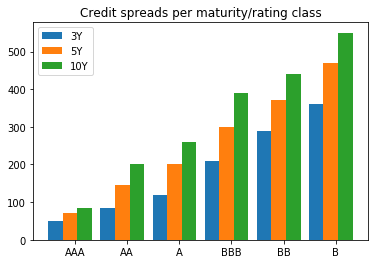

In [46]:
import numpy as np
n = 6
year3 = (50, 85, 120, 210, 290, 360)
year5 = (70, 145, 200, 300, 370, 470)
year10 = (85, 200, 260, 390, 440, 550)

ind = np.arange(n) 
width = 0.28       
plt.bar(ind, year3, width, label='3Y')
plt.bar(ind  + width, year5, width,label='5Y')
plt.bar( ind + width +width, year10, width,label='10Y')


plt.title('Credit spreads per maturity/rating class')
plt.xticks(ind + width + width  / 3, ('AAA', 'AA', 'A', 'BBB', 'BB', 'B'))
plt.legend(loc='best')
plt.show()

## Setting the classifier
We use the training set defined above to set up the classifier based on similarity measure using k-nearest neighbor method.

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

In [184]:
training_set = np.array([ ['AAA', 3, 50] ,
          ['AAA', 5, 70] ,
          ['AAA', 10, 85],
         ['AA', 3, 85],
         ['AA', 5, 145],
         ['AA', 10, 200],
         ['A', 3, 120],
         ['A', 5, 200],
         ['A', 10, 260],
         ['BBB', 3, 210],
         ['BBB', 5, 300],
         ['BBB', 10, 390],
         ['BB', 3, 290],
         ['BB', 5, 370],
         ['BB', 10, 440],
         ['B', 3, 360],
         ['B', 5, 470],
         ['B', 10, 550] ])
         
         


In [220]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(training_set[:,1:3], trainingset[:,0])


/Users/euniceofori-addo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/Users/euniceofori-addo/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py:399: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Classifier testing
We can test and validate the classifier. 



In [188]:
validation_set = np.array([ ['AAA', 3, 46],
                           ['AAA', 5, 18],
                           ['AAA', 10, 92],
                           ['AA', 3, 91],
                           ['AA', 5, 155],
                           ['AA', 10, 202],
                           ['A', 3, 126],
                           ['A', 5, 215],
                           ['A', 10, 259],
                           ['BBB', 3, 219],
                           ['BBB', 5, 311],
                           ['BBB', 10, 399],
                           ['BB', 3, 292],
                           ['BB', 5, 378],
                           ['BB', 10, 442],
                           ['B', 3, 350],
                           ['B', 5, 460],
                           ['B', 10, 568]
                          
                          ]) 

In [192]:
predict = classifier.predict(validation_set[:,1:3])

/Users/euniceofori-addo/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/Users/euniceofori-addo/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py:604: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


In [226]:
## Checking the accuracy of prediction
print(classifier.predict([[10,259]]))
print(classifier.predict([[10, 568]])) # Compare results with dataset in validating_set

['A']
['B']


## Testing accuracy of the classifier
To evaluate our model. We use a Confusion Matrix.

In [208]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(training_set[:,0], predict)
print("Confusion Matrix:")
print(result)
result1 = classification_report(training_set[:,0], predict)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(training_set[:,0], predict)
print("Accuracy:",result2)

Confusion Matrix:
[[2 0 0 0 0 1]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.67      0.80         3
          AA       1.00      1.00      1.00         3
         AAA       1.00      1.00      1.00         3
           B       1.00      1.00      1.00         3
          BB       1.00      1.00      1.00         3
         BBB       0.75      1.00      0.86         3

    accuracy                           0.94        18
   macro avg       0.96      0.94      0.94        18
weighted avg       0.96      0.94      0.94        18

Accuracy: 0.9444444444444444


The confusion matrix confirms that the classifer assigns the sample test data to the rating classes almost correctly.

## References
https://towardsdatascience.com/knn-in-python-835643e2fb53
https://community.wolfram.com/groups/-/m/t/465774